In [1]:
## TITANIC SURVIVAL PREDICTION

## Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## DATA PROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## PEMILIHAN MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [2]:
## Data

train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
print('Loading of train dan test datasets is successfully completed!')

Loading of train dan test datasets is successfully completed!


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

train_df.duplicated().sum()

0

In [8]:
## Missing values 

mis_val = train_df.isnull().sum().sort_values(ascending=False)
mis_val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

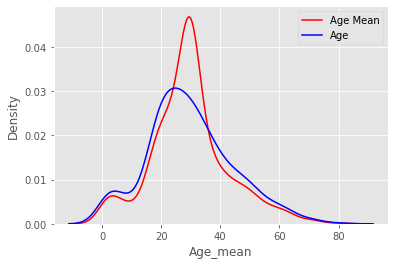

In [9]:
## curves comparasi = initial values vs replace mean values

train_df['Age_mean'] = train_df['Age'].fillna(train_df['Age'].mean())

sns.kdeplot(train_df['Age_mean'] , color='red' , label='Age Mean')
sns.kdeplot(train_df['Age'] , color='blue' , label='Age')
plt.legend()

In [10]:
## Replace all with Mean

train_df.drop(['Age_mean'], axis=1 , inplace=True)

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

print('Number of missing value in Age of train data is' , 
     train_df['Age'].isnull().sum())
print('Number of missing value in Age of test data is' , 
     train_df['Age'].isnull().sum())

Number of missing value in Age of train data is 0
Number of missing value in Age of test data is 0


In [11]:
train_df.drop(["Cabin" , "Name" , "Ticket" , "Fare" , "PassengerId"], axis=1, inplace=True)

test_df.drop(['Cabin', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)


In [12]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [13]:
## VISUALISASI ANALISIS

pd.DataFrame({' ' : ['Not Survived','Survived'] , 'Value counts' : train_df['Survived']
             .value_counts(), 'Percentage(%)' : [(train_df['Survived']==0)
                                                 .sum()*100/len(train_df) , (train_df['Survived']==1)
                                                 .sum()*100/len(train_df)]}).set_index(' ').head()
            


,Value counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


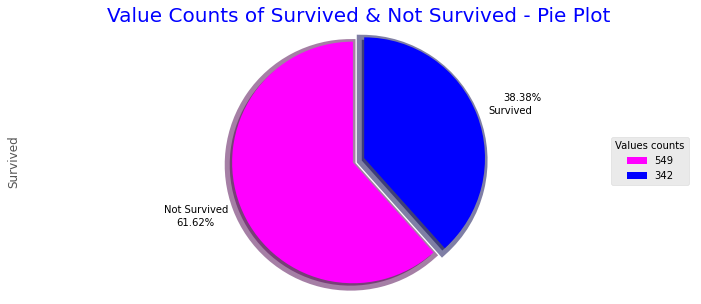

In [14]:
train_df['Survived'].value_counts().plot(kind='pie' , figsize=(12,5) , startangle=90 , autopct='%1.2f%%' ,
                                         shadow=True , labels=['Not Survived', 'Survived'] , pctdistance=1.4 , 
                                         wedgeprops = {'linewidth': 10} ,
                                         colors=['magenta' , 'blue'] , explode=[0.1 , 0])


plt.title('Value Counts of Survived & Not Survived - Pie Plot' , c = 'b' , size=20, y=0.99)
plt.axis('equal')
plt.legend(title='Values counts' , labels=train_df['Survived'].value_counts() , loc='right')


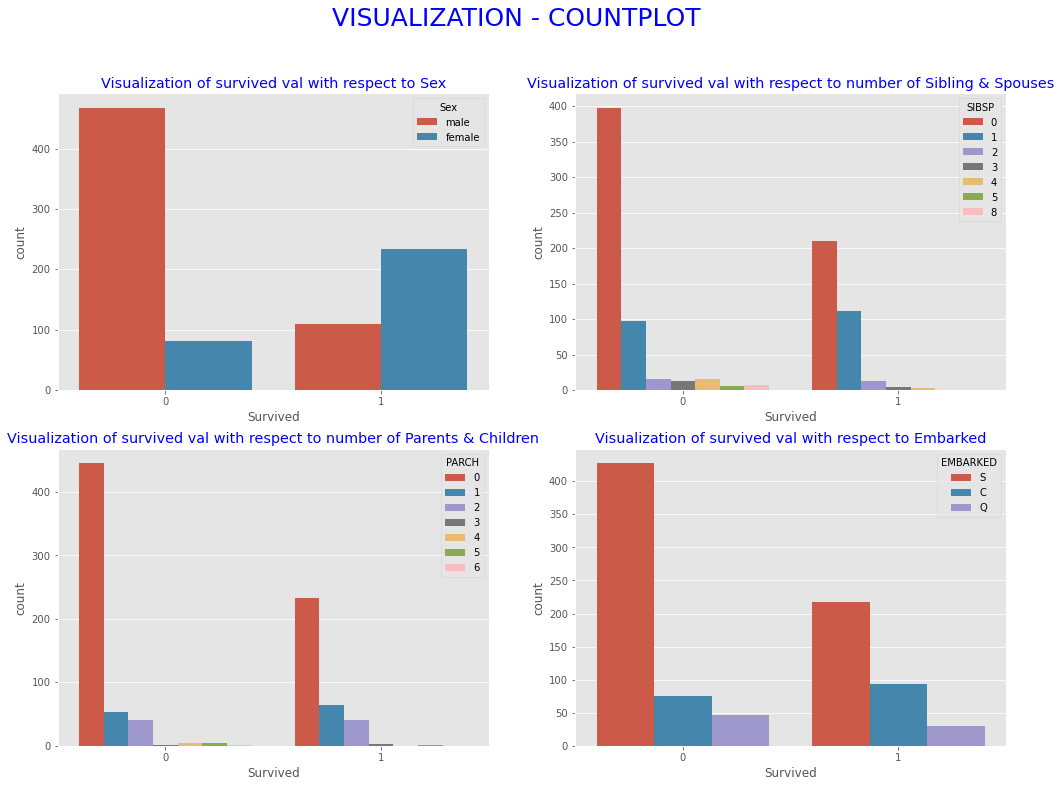

In [15]:
## VISUALISASI COUNTPLOT 

fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(17,12));
fig.suptitle('VISUALIZATION - COUNTPLOT' , c='Blue' , size=25)

sns.countplot('Survived' , data=train_df , hue = 'Sex' , ax=axs[0][0])
axs[0][0].set_title("Visualization of survived val with respect to Sex" , c='blue')

sns.countplot('Survived' , data=train_df , hue = 'SibSp' , ax=axs[0][1])
axs[0][1].set_title('Visualization of survived val with respect to number of Sibling & Spouses' , c='blue')
axs[0][1].legend(title='SIBSP' , loc='upper right')
                    
sns.countplot('Survived' , data=train_df , hue = 'Parch' , ax=axs[1][0])
axs[1][0].set_title('Visualization of survived val with respect to number of Parents & Children' , c='blue')
axs[1][0].legend(title='PARCH' , loc='upper right')                   
                    
sns.countplot('Survived' , data=train_df , hue = 'Embarked' , ax=axs[1][1])
axs[1][1].set_title('Visualization of survived val with respect to Embarked' , c='blue')
axs[1][1].legend(title='EMBARKED' , loc='upper right')
                    
plt.show()                   

In [16]:
# Sex = Pria lebih banyak yang tidak selamat (0) & Wanita lebih banyak yang selamat
# Keluarga = penumpang solo lebih banyak yang tidak selamat tapi juga yang jumlahnya paling banyak selamat
# 

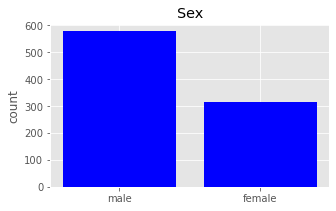

Sex 
male      577
female    314
Name: Sex, dtype: int64


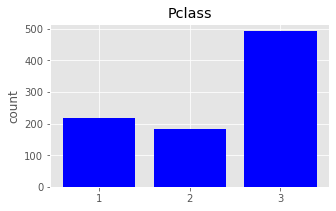

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64


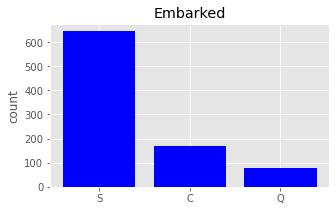

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


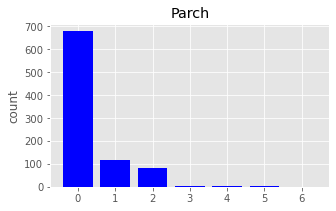

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


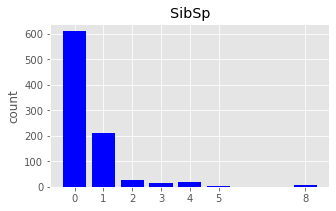

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [17]:
## VISUALISASI BARPLOT 

def bar_graph(features):
    feature = train_df[features]
    feature_val = feature.value_counts()
        
    plt.figure(figsize=(5,3))
    plt.bar(feature_val.index , feature_val , color='blue')
    plt.title(features)
    plt.xticks(feature_val.index , feature_val.index.values)
    plt.ylabel('count')
    
    plt.show()
    print('{} \n{}'.format(features , feature_val))
    
cols = ['Sex' , 'Pclass' , 'Embarked' , 'Parch' , 'SibSp']
for i in cols:
    bar_graph(i)
    

In [18]:
## CROSS TABLE

pd.crosstab(train_df['Survived'] , train_df['Sex'], margins=True , margins_name='Total')

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


In [19]:
# Wanita lebih banyak selamat dari Laki-laki

In [20]:
pd.crosstab(train_df['Survived'] , train_df['Pclass'], margins=True , margins_name='Total')

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [21]:
# Penumpang di kelas 3 yang paling banyak tidak selamat dan yang lebih banyak selamat ada di kelas 1

In [22]:
pd.crosstab(train_df['Survived'] , train_df['SibSp'], margins=True , margins_name='Total')

SibSp,0,1,2,3,4,5,8,Total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
Total,608,209,28,16,18,5,7,891


In [23]:
# Penumpang yang tidak bersama saudara/keluarga lebih banyak yang tidak selamat di banding yang lainnya

In [24]:
## DATA PROCESSING

lben = LabelEncoder()

train_df['Sex'] = lben.fit_transform(train_df['Sex'].values)
train_df['Embarked'] = lben.fit_transform(train_df['Embarked'].values)

test_df['Sex'] = lben.fit_transform(test_df['Sex'].values)
test_df['Embarked'] = lben.fit_transform(test_df['Embarked'].values)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [26]:
X_train = train_df.iloc[: , 1:7]
Y_train = train_df.loc[: , 'Survived']
X_test = test_df.drop('PassengerId', axis=1)

In [27]:
sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)
X_test = sc_object.transform(X_test)

In [28]:
## PEMILIHAN MODEL

# LogisticRegression

l_regression = LogisticRegression()
l_regression.fit(X_train , Y_train)
ireg_score = round(l_regression.score(X_train , Y_train) * 100, 2)
print('Accuracy LogisticRegression Model = ',ireg_score)

# Decision Tree Model

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train , Y_train)
dtree_score = round(d_tree.score(X_train, Y_train) * 100, 2)
print('Accuracy Decision Tree Model = ',dtree_score)

# Randomforest Model

r_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
r_forest.fit(X_train, Y_train)
rf_score = round(r_forest.score(X_train, Y_train) * 100, 2)
print('Accuracy Randomforest Model = ',rf_score)

# SVC

svc = SVC(kernel = 'rbf',random_state =0)
svc.fit(X_train, Y_train)
svc_score = round(svc.score(X_train, Y_train) * 100, 2)
print('Accuracy SVC Model = ', svc_score)

# Gaussian NB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_score = round(svc.score(X_train, Y_train) * 100, 2)
print('Accuracy Gaussian NB = ', nb_score) 

# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3 , metric = 'minkowski' , p=2)
knn.fit(X_train, Y_train)
knn_score = round(knn.score(X_train, Y_train) * 100, 2)
print('Accuracy K Nearest Neighbors = ', knn_score)

Accuracy LogisticRegression Model =  80.36
Accuracy Decision Tree Model =  93.71
Accuracy Randomforest Model =  93.71
Accuracy SVC Model =  84.4
Accuracy Gaussian NB =  84.4
Accuracy K Nearest Neighbors =  86.98


In [29]:
selection = pd.DataFrame({'Models' : ['Logistics','DecisionTree','RandomForest','SVC','GaussianNB','KNN'] ,
                         'Accuracy Val' : [ireg_score,dtree_score,rf_score,svc_score,nb_score,knn_score]})
selection.sort_values(by='Accuracy Val' , ascending=False)

,Models,Accuracy Val
1,DecisionTree,93.71
2,RandomForest,93.71
5,KNN,86.98
3,SVC,84.40
4,GaussianNB,84.40
0,Logistics,80.36


Text(0.5, 1.0, ' Comparing Score Models')

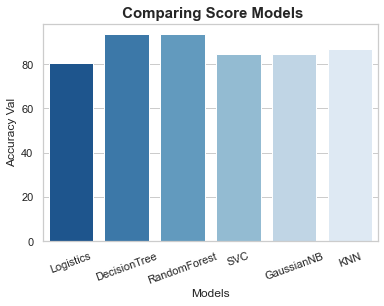

In [30]:
sns.set_theme(style='whitegrid')
sns.barplot(x='Models',y='Accuracy Val',data=selection,palette='Blues_r')
plt.xticks(rotation=20)
plt.title(' Comparing Score Models',weight='bold',size=15)


In [31]:
## MODEL SAVING : DECISION TREE

final_prediction = d_tree.predict(X_test)

In [32]:
output_df = pd.DataFrame({'PassengerId' : test_df['PassengerId'] , 'Survived' : final_prediction})
output_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0


In [33]:
# END & Thank you -